<a href="https://colab.research.google.com/github/Azariagmt/jupyter-notebooks/blob/master/Predict_the_price_of_an_Airbnb_listing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objective:** build a machine learning model that will automatically predict the price for lodging or homestays.

In [32]:
import pandas as pd
airbnb_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/airbnb%20_data/airbnb_listing_train.csv", index_col='id')

In [33]:
print(airbnb_data.shape)
airbnb_data.head()

(12901, 15)


,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price
id,,,,,,,,,,,,,,,
11602914,Luxury home 100m2+garden in center!,3123809,Marjolein,NaN,De Pijp - Rivierenbuurt,52.35368,4.90177,Entire home/apt,3,13,15-02-2020,0.27,1,0,220
13289321,East is where your home is!,10259430,Ana,NaN,Oud-Oost,52.35728,4.92052,Entire home/apt,4,14,19-06-2019,0.29,1,0,110
40779315,Amsterdam Central - LUXURY house in BUSY STREET,224969266,Mark,NaN,Centrum-West,52.37582,4.89850,Entire home/apt,2,9,16-03-2020,1.65,1,7,100
7820311,great appartment down town,693472,Ayden,NaN,Westerpark,52.37792,4.87300,Entire home/apt,3,42,17-02-2020,0.72,1,0,130
27346603,Private room with canal view in peaceful area,41888346,Alissa,NaN,Westerpark,52.38051,4.87493,Private room,2,89,26-02-2020,4.02,1,24,90


In [34]:
airbnb_data = airbnb_data[airbnb_data['price']< 2000]

In [24]:
features = ['neighbourhood','room_type', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']
X = airbnb_data[features]
y = airbnb_data['price']
X.head()

,neighbourhood,room_type,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
id,,,,,,
11602914,De Pijp - Rivierenbuurt,Entire home/apt,3,13,1,0
13289321,Oud-Oost,Entire home/apt,4,14,1,0
40779315,Centrum-West,Entire home/apt,2,9,1,7
7820311,Westerpark,Entire home/apt,3,42,1,0
27346603,Westerpark,Private room,2,89,1,24


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


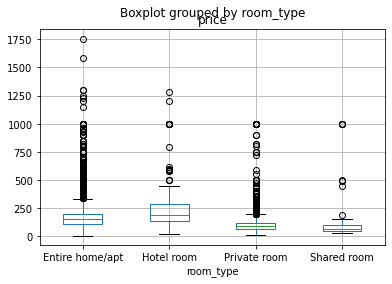

In [25]:
airbnb_data.boxplot(column='price', by='room_type')

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


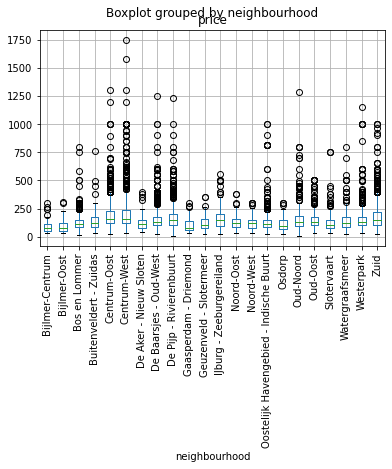

In [26]:
import matplotlib.pyplot as plt
airbnb_data.boxplot(column='price', by='neighbourhood')
plt.xticks(rotation = 90)
plt.show()

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 101)

In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
# Train the model
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

# Define preprocessing for numeric columns (scale them)
numeric_features = [2,3,4,5]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features (encode them)
categorical_features = [0,1]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', GradientBoostingRegressor())])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  [2, 3, 4, 5]),
                                                 ('cat',
                                                  Pipeline(memory=N

MSE: 9005.956533034687
RMSE: 94.8997182979733
R2: 0.20347267648080702


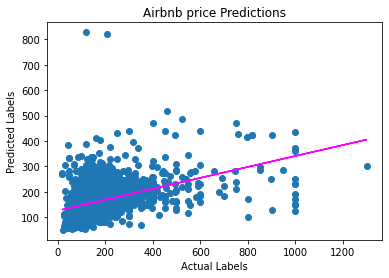

In [31]:
from sklearn.metrics import *
# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Airbnb price Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [ ]:
import joblib

# Save the model as a pickle file
filename = './models/predict-price.pkl'
joblib.dump(model, filename)